# Energy Efficiency Dataset – EDA and Cleaning (Drop-NaN Version)

## 1. Introduction
This notebook continues the cleaning and analysis workflow for the **Energy Efficiency Dataset (UCI)**,  
focusing on the version where all rows containing missing values were **dropped**.  

In the previous notebook, two strategies were defined:
1. **Drop-NaN version:** remove rows containing missing data.
2. **Fill-NaN version:** fill missing values using median imputation.

This notebook explores and processes the **Drop-NaN version**, emphasizing data integrity and precision.  
The goal is to:
- Detect and remove outliers using statistical methods.
- Validate distributions through visual analysis.
- Ensure categorical variables (`X6`, `X8`) contain only valid categories.
- Prepare a highly reliable dataset for later modeling.

---

## 2. Dataset Overview
The dataset used here (`data/interim/energy_efficiency_interim_clean_drop.csv`) was loaded and reviewed.

---

## 3. Outlier Detection and Removal (IQR Method)
Outliers were identified and removed using the **Interquartile Range (IQR)** method applied to continuous features:  
`X1`, `X2`, `X3`, `X4`, `X5`, `X7`, `Y1`, and `Y2`.

###  Validation
Boxplots before and after filtering confirmed that:
- Extreme geometric and load values were removed.
- Remaining distributions show balanced ranges with no excessive skewness.

---

## 4. Categorical Cleaning (`X6`, `X8`)
Both categorical variables contained noise-induced invalid category codes.

---

## 5. Exploratory Data Analysis
A comprehensive EDA was performed on the cleaned dataset.

---

## 6. Correlation Analysis
A **Pearson correlation heatmap** was computed for continuous variables (`X1–X5`, `X7`, `Y1`, `Y2`).

---

## 7. Data Saving and Versioning
After cleaning, the final filled dataset was saved under:
`data/processed/energy_efficiency_clean_drop`.csv and .parquet formats.

### Imports for the code
This section imports the necessary libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load and Inspect the Dataset
The dataset is loaded from a CSV file, and initial inspections are performed to understand its structure and content.
Checking skewness and kurtosis helps identify potential outliers.
Showing min and max values for each column provides insights into the data range.

In [2]:
# * Load dataset
df = pd.read_csv("../data/interim/energy_efficiency_interim_clean_drop.csv")

# Convert to int first (since they are floats)
df['X6'] = df['X6'].astype('int').astype('category')
df['X8'] = df['X8'].astype('int').astype('category')

# Basic info
print(df.shape)
df.info()
df.head()

(680, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      680 non-null    float64 
 1   X2      680 non-null    float64 
 2   X3      680 non-null    float64 
 3   X4      680 non-null    float64 
 4   X5      680 non-null    float64 
 5   X6      680 non-null    category
 6   X7      680 non-null    float64 
 7   X8      680 non-null    category
 8   Y1      680 non-null    float64 
 9   Y2      680 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 44.7 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# * Descriptive statistics with skewness and kurtosis
desc = df.describe().T
desc['skewness'] = df.skew(numeric_only=True)
desc['kurtosis'] = df.kurtosis(numeric_only=True)
desc

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
X1,680.0,2.792838,37.254035,0.62,0.6600,0.760,0.8200,902.62,22.096424,514.959420
X2,680.0,792.928676,2004.515638,514.50,612.5000,686.000,759.5000,46893.00,19.956776,431.760996
X3,680.0,368.820588,962.202404,245.00,294.0000,318.500,343.0000,24622.50,24.015657,599.044779
X4,680.0,213.593750,506.105692,110.25,147.0000,220.500,220.5000,9310.00,15.323982,244.896103
X5,680.0,11.214706,61.824960,3.50,3.5000,7.000,7.0000,955.50,11.744298,147.716853
X7,680.0,1.930294,26.468664,0.00,0.1000,0.250,0.4000,516.00,17.197459,306.023355
Y1,680.0,28.781465,81.028995,6.01,13.0000,19.090,32.0625,1676.70,15.511023,279.150642
Y2,680.0,34.398206,116.260803,10.90,15.7125,22.625,33.3175,2337.03,15.141219,261.045501


In [4]:
# * Show min and max for every column
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    col_min = df[col].min()
    col_max = df[col].max()
    print(f"{col:>3} → min: {col_min:>10} | max: {col_max:>10}")

 X1 → min:       0.62 | max:     902.62
 X2 → min:      514.5 | max:    46893.0
 X3 → min:      245.0 | max:    24622.5
 X4 → min:     110.25 | max:     9310.0
 X5 → min:        3.5 | max:      955.5
 X7 → min:        0.0 | max:      516.0
 Y1 → min:       6.01 | max: 1676.6999999999998
 Y2 → min:       10.9 | max: 2337.0299999999997


### Visualizations Before Cleaning
Histograms and boxplots are created for continuous variables to visualize their distributions and identify potential outliers.
Count plots for categorical variables (`X6`, `X8`) help identify invalid categories.

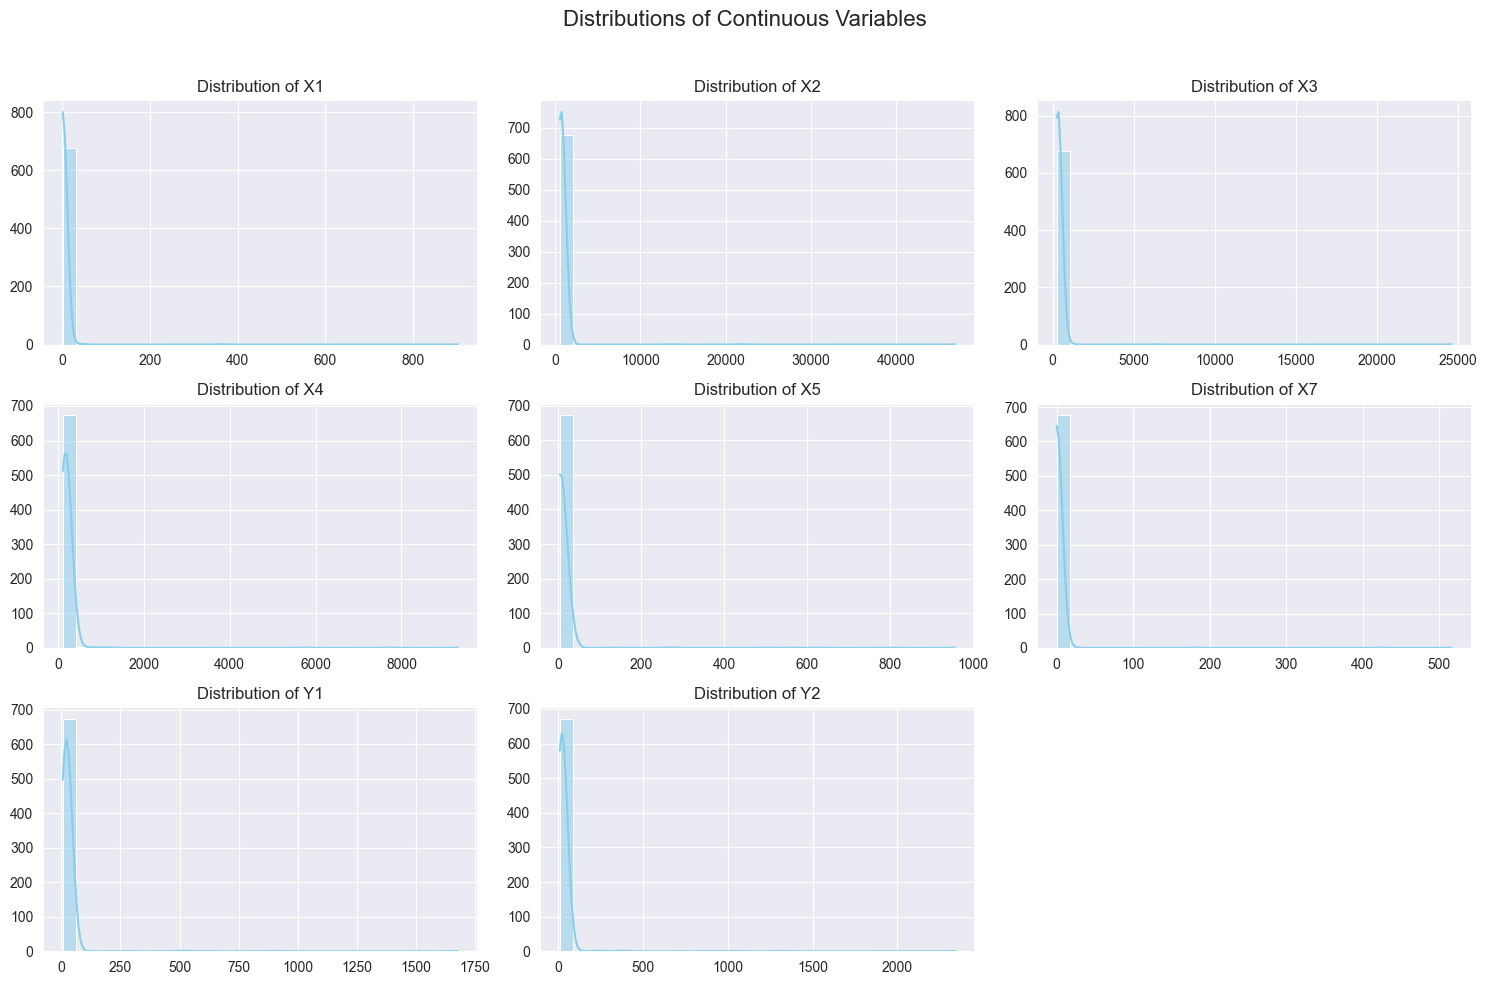

In [5]:
# * Histograms Continuous Variables
continuous_cols = ['X1','X2','X3','X4','X5','X7','Y1','Y2']

# 3 columns per row
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols  # automatic row count

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten grid for easy iteration

for i, col in enumerate(continuous_cols):
    sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distributions of Continuous Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

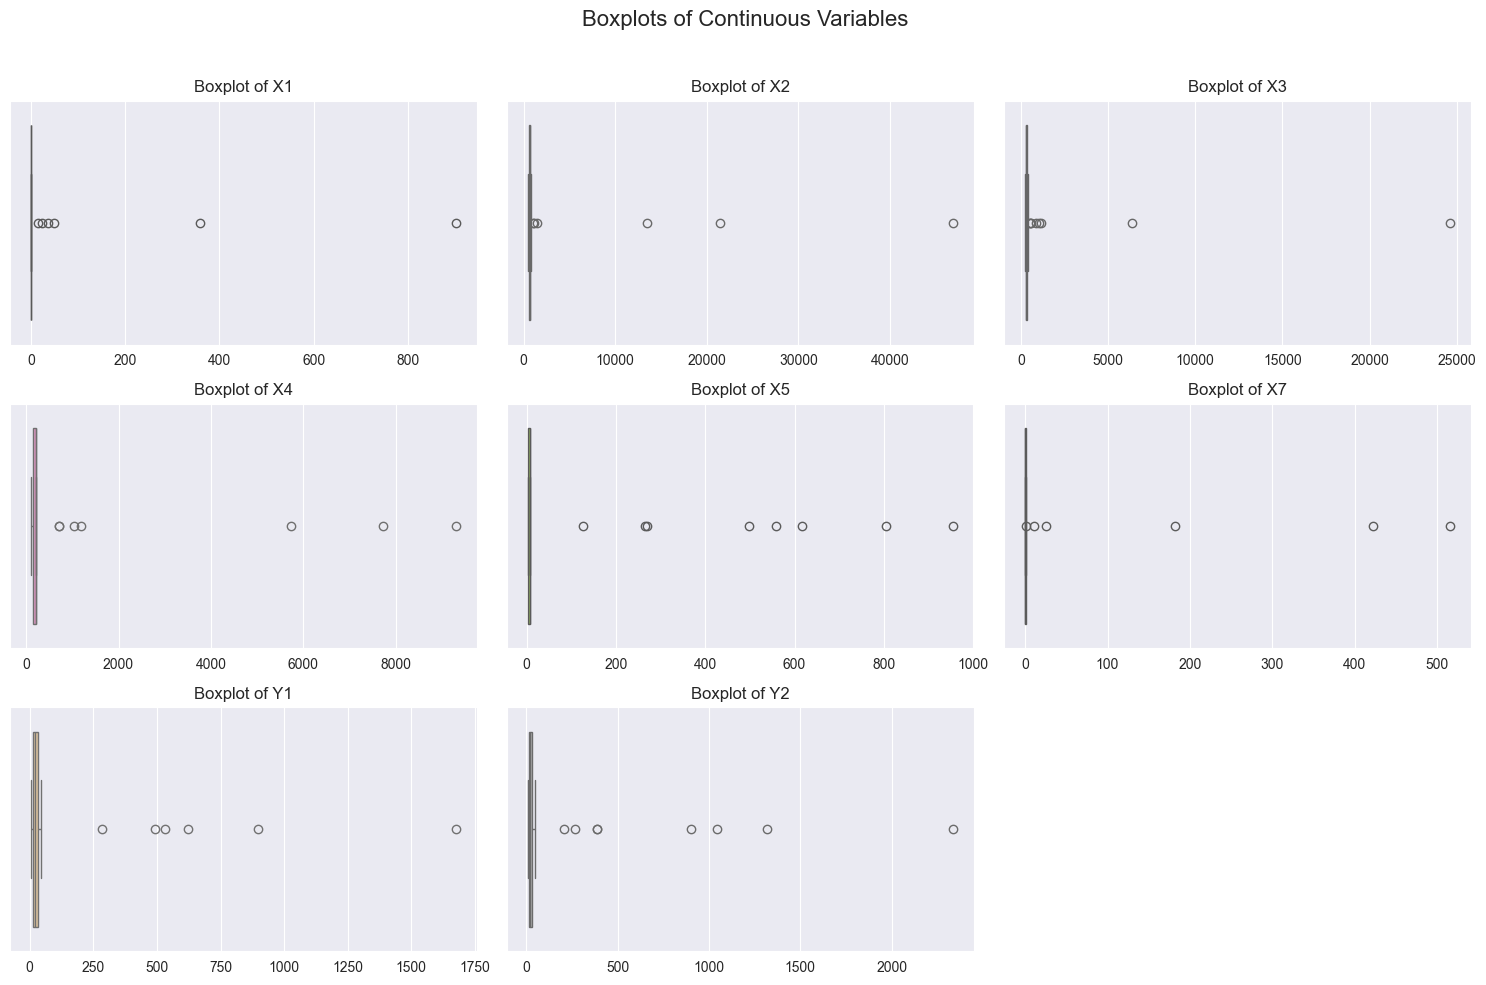

In [6]:
# * Boxplots Continuous Variables
palette = sns.color_palette('Set2', len(continuous_cols))
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(data=df, x=col, color=palette[i], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots of Continuous Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

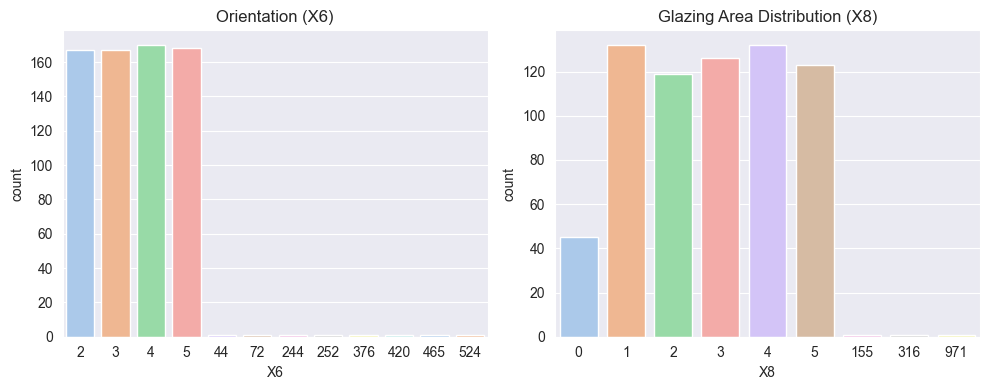

In [7]:
# * Countplots Categorical Variables
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x='X6', hue='X6', data=df, palette='pastel', legend=False, ax=axes[0])
sns.countplot(x='X8', hue='X8', data=df, palette='pastel', legend=False, ax=axes[1])

axes[0].set_title('Orientation (X6)')
axes[1].set_title('Glazing Area Distribution (X8)')
plt.tight_layout()
plt.show()

### Outlier Removal Using IQR Method
The IQR method is applied to continuous numeric columns to identify and remove outliers.
The number of outliers removed per column is reported.

In [8]:
# * IQR Method to Remove Outliers
df_iqr = df.copy()

num_cols = ['X1','X2','X3','X4','X5','X7','Y1','Y2']

rows_before = df_iqr.shape[0]
outlier_counts = {}

for col in num_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers for report
    n_outliers = ((df_iqr[col] < lower) | (df_iqr[col] > upper)).sum()
    outlier_counts[col] = n_outliers

    # Filter
    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

rows_after = df_iqr.shape[0]

print(f"Before filtering: {rows_before}")
print(f"After filtering : {rows_after}\n")
print("Outliers removed per column:")
for col, n in outlier_counts.items():
    print(f"{col}: {n}")

Before filtering: 680
After filtering : 625

Outliers removed per column:
X1: 6
X2: 6
X3: 8
X4: 7
X5: 8
X7: 6
Y1: 6
Y2: 8


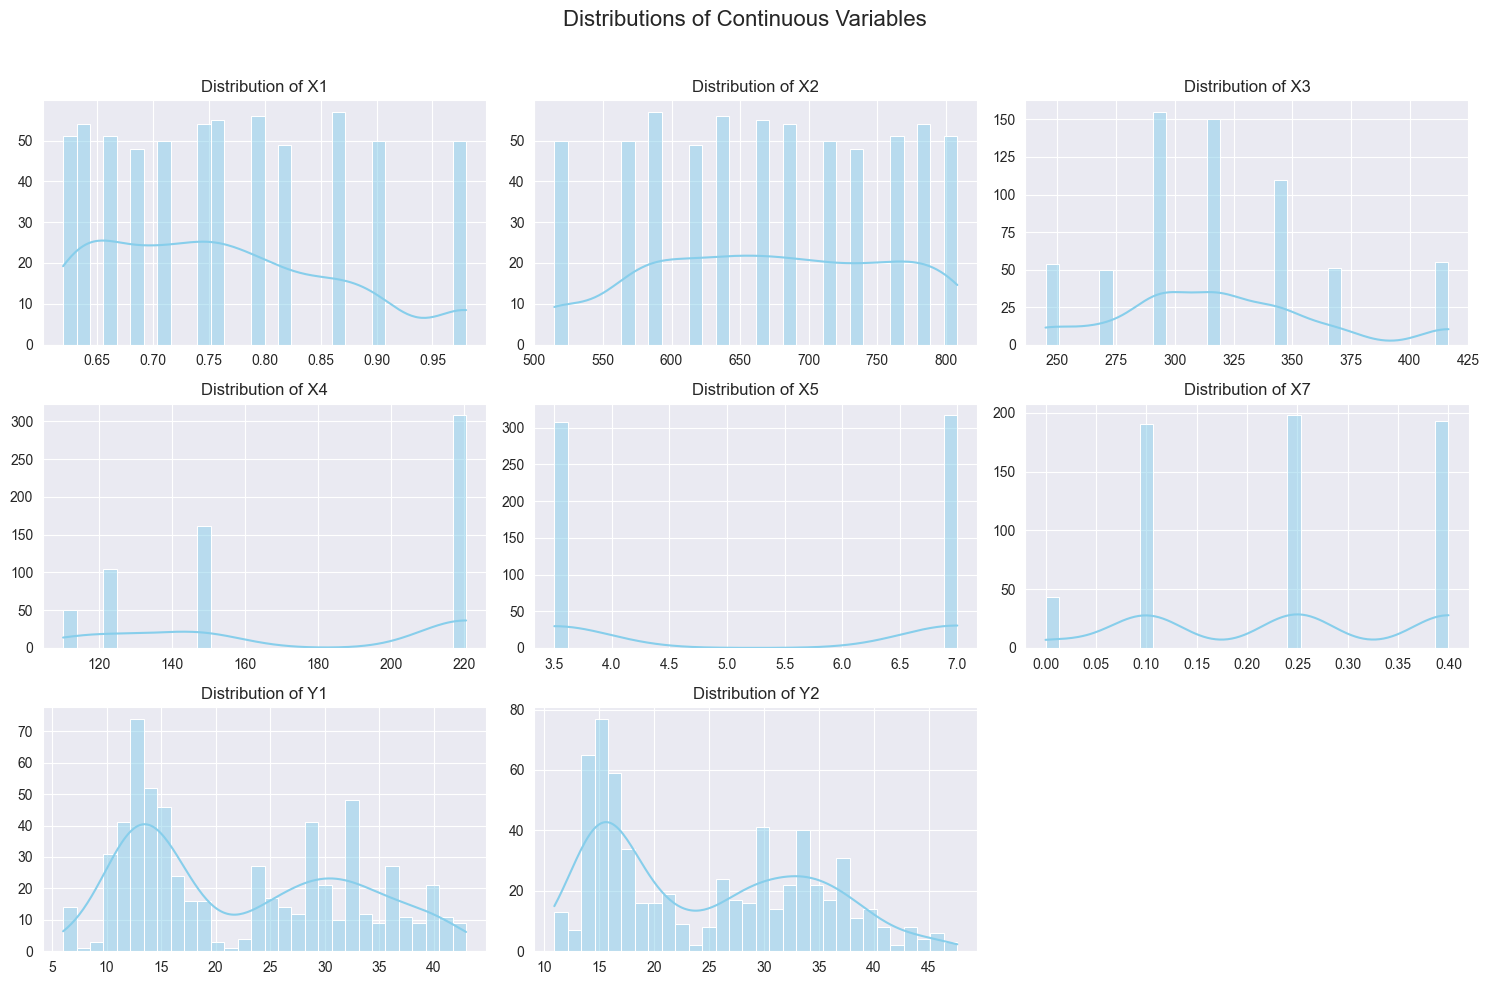

In [9]:
# * Histograms After IQR Filtering
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols  # automatic row count

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten grid for easy iteration

for i, col in enumerate(continuous_cols):
    sns.histplot(data=df_iqr, x=col, bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distributions of Continuous Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

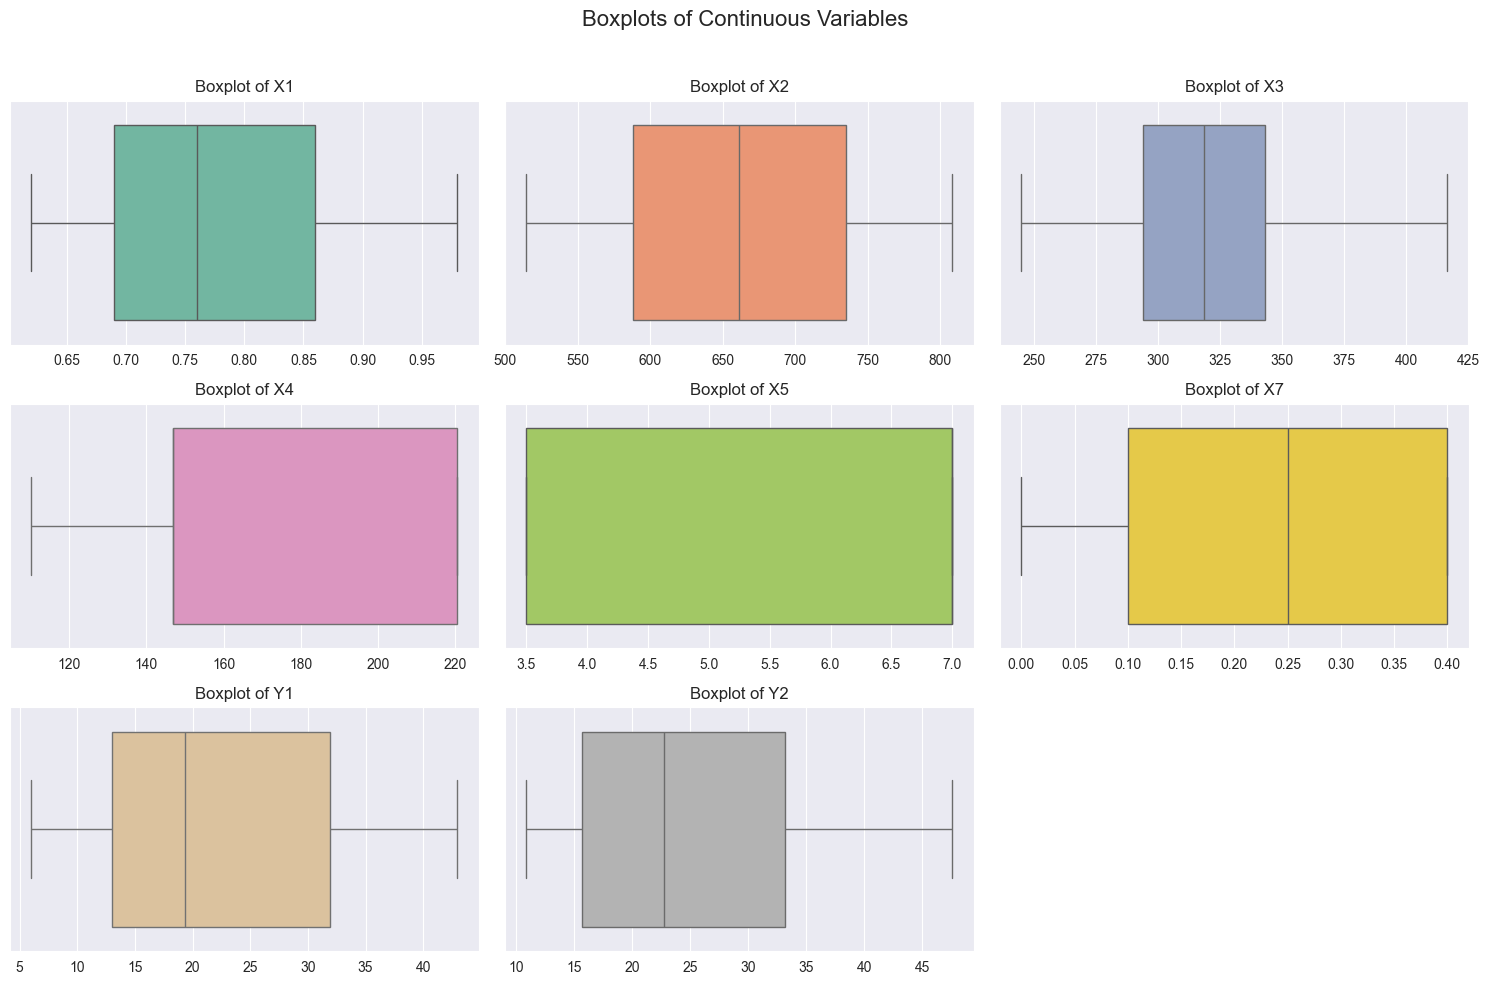

In [10]:
# * Boxplots After IQR Filtering
palette = sns.color_palette('Set2', len(continuous_cols))
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(data=df_iqr, x=col, color=palette[i], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots of Continuous Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
# * Clean Categorical Variables
df_cat_clean = df_iqr.copy()

# Convert X6 and X8 to numeric first
df_cat_clean['X6'] = pd.to_numeric(df_cat_clean['X6'], errors='coerce')
df_cat_clean['X8'] = pd.to_numeric(df_cat_clean['X8'], errors='coerce')

valid_X6 = [2, 3, 4, 5]
valid_X8 = [0, 1, 2, 3, 4, 5]

# Apply the valid-category filter
df_cat_clean = df_cat_clean[df_cat_clean['X6'].isin(valid_X6)]
df_cat_clean = df_cat_clean[df_cat_clean['X8'].isin(valid_X8)]

print("Shape after cleaning categorical outliers:", df_cat_clean.shape)
print("Unique X6:", sorted(df_cat_clean['X6'].unique()))
print("Unique X8:", sorted(df_cat_clean['X8'].unique()))

Shape after cleaning categorical outliers: (614, 10)
Unique X6: [np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Unique X8: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


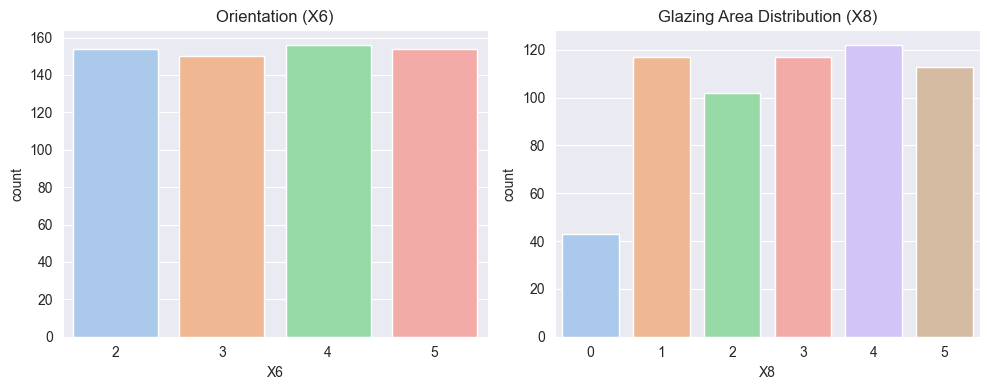

In [12]:
# * Countplots After Cleaning Categorical Variables
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x='X6', hue='X6', data=df_cat_clean, palette='pastel', legend=False, ax=axes[0])
sns.countplot(x='X8', hue='X8', data=df_cat_clean, palette='pastel', legend=False, ax=axes[1])

axes[0].set_title('Orientation (X6)')
axes[1].set_title('Glazing Area Distribution (X8)')
plt.tight_layout()
plt.show()

### Correlation Heatmap
A Pearson correlation heatmap is generated for continuous variables to visualize relationships and confirm data consistency.

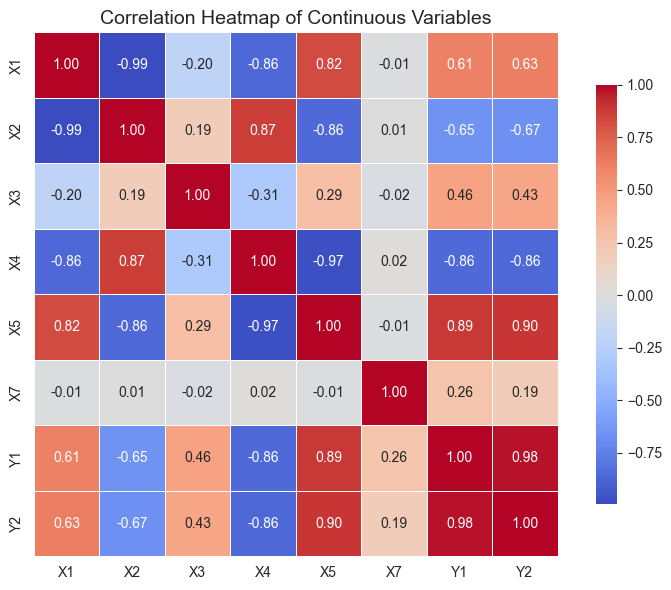

In [13]:
# * Correlation Heatmap
numeric_cols = ['X1','X2','X3','X4','X5','X7','Y1','Y2']

corr = df_cat_clean[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap of Continuous Variables", fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
# * Code to save the dataset version
df_cat_clean.to_csv("../data/processed/energy_efficiency_clean_drop.csv", index=False)
# * Save a parquet version
df_cat_clean.to_parquet("../data/processed/energy_efficiency_clean_drop.parquet", index=False, engine="fastparquet")

print("All datasets saved successfully.")

All datasets saved successfully.
